# EDA (Exploratory Data Analysis)

1. load dataset
2. clean data (missing value, duplicates, types)
3. treat outliers
4. Univariate, bivariate and multivariate analysis
5. insights

Outlier - a data point that is significantly different from other observations in a dataset.

How outliers will come---? 
1. Measurement errors
2. Data entry mistakes

Why they are important---?
1. They can be errors
2. They can effect Data analysis

How to identify the outlayers---?
1. Statistical Methods
---> Interquartile Range(IQR)
---> Z-Score
2. Visualization Tech
---> box plot
---> Scatter plot
---> Histograms

### Univariate Analysis - a method that analyzes a single variable to describe its chatacteristics and find patterns and summarize the data.
#### it involves only one variable.
### Bivariate analysis - it will give relationship between the two variables, it helps to find if there is any co-relation, association or any connection between the two variables.
#### It involves two variables(x & y).
### Multivariate analysis - to undersatand how multiple factors interact and influence each other.
#### it involves more than 2 
Example - 

How our age, income and education level together influence the purchasing behaviour.

# ETL
# ELT

## EDA : < Dataset >

1. Load & Overview 
2. Cleaning (missing, dupes, dtypes)
3. Uni, bi, Multi variate Analysis
4. Outlier - IQR
5. Feature Engineering
6. Key Insights

### Feature Engineering - it is the process of turning the raw data into useful features that helps to improve the performance of machine learning models.

In [2]:
# 1. Load libraries & Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Basic information and Overview

print("Shape of the dataset:", df.shape)
print("\n Data Info:", df.info())

# Summary Statistics
df.describe(include='all')

Shape of the dataset: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

 Data Info: None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Missing Values Analysis

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': df.isnull().sum() / len(df) * 100
    
})
missing.sort_values(by='missing_percentage', ascending=False)

,missing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [6]:
# Handling Missing Values

# Fill the numeric missing values with mean

df['age'] = df['age'].fillna(df['age'].mean())

# Fill the categorical missing values with mode

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column due to high missing values

df = df.drop(columns=['deck'])

print("\n Missing values after cleaning:\n", df.isnull().sum().sum())




 Missing values after cleaning:
 2


In [7]:
# Missing Values Analysis

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': df.isnull().sum() / len(df) * 100
    
})
missing.sort_values(by='missing_percentage', ascending=False)

,missing_count,missing_percentage
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


Insight : we filled important columns and removed highly missing ones. 

This keeps maximum information while making the dataset clean.

In [8]:
# Duplicate & Data type check

print("Duplicate rows:", df.duplicated().sum())

# Convert some cloumns to category type 

df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()



Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


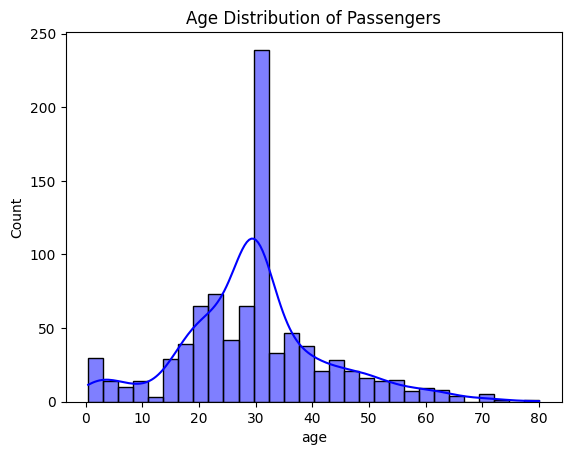

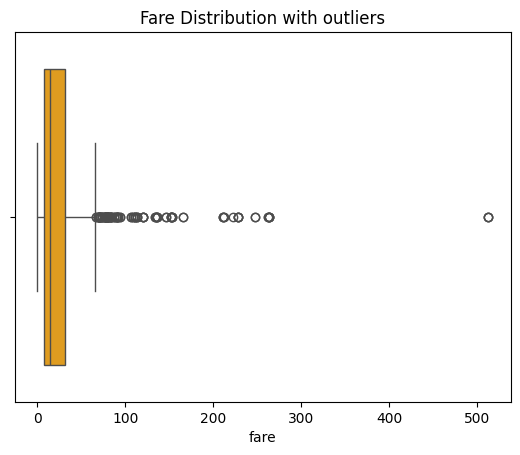

In [9]:
#6. Univariate Analysis - Numerical Features

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].describe()

#Histogram : Age

sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.show()

# Boxplot : Fare

sns.boxplot(x=df['fare'], color='orange')
plt.title('Fare Distribution with outliers')
plt.show()


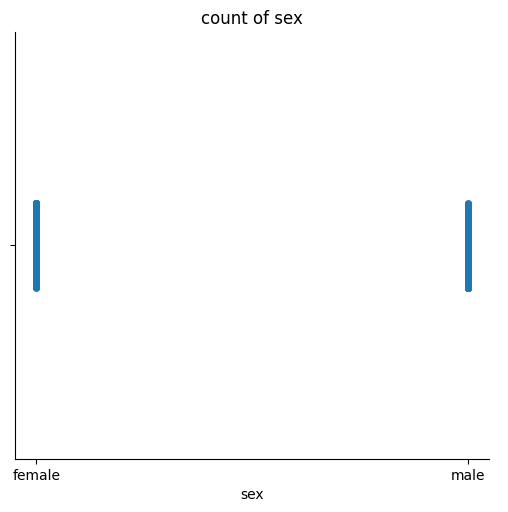

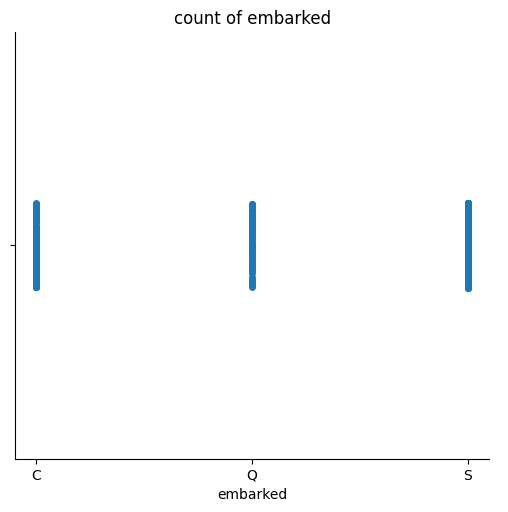

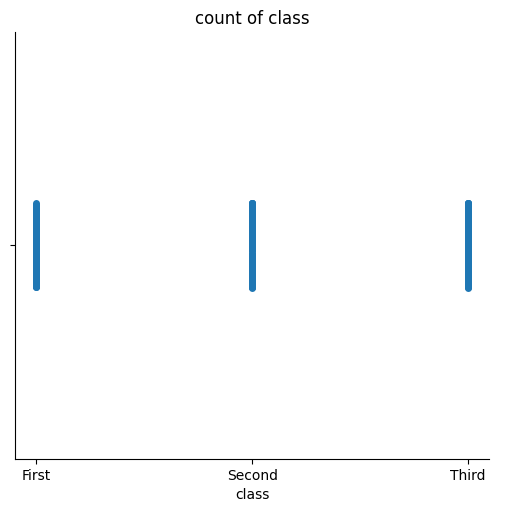

In [14]:
# Univariate Analysis - Categorical Features

cat_clos = df.select_dtypes('category').columns

for col in cat_clos:
    sns.catplot(x=col, data=df)
    plt.title(f'count of {col}')
    plt.show()

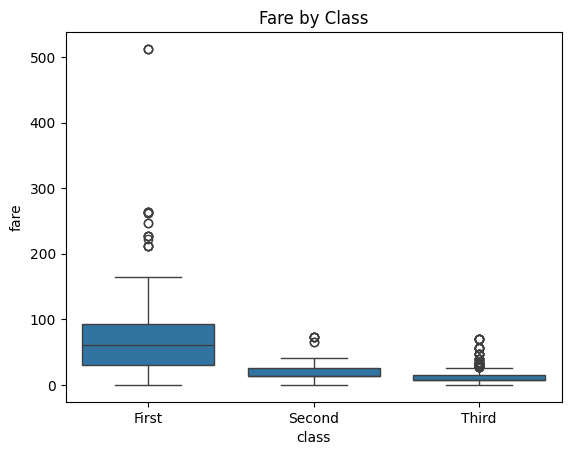

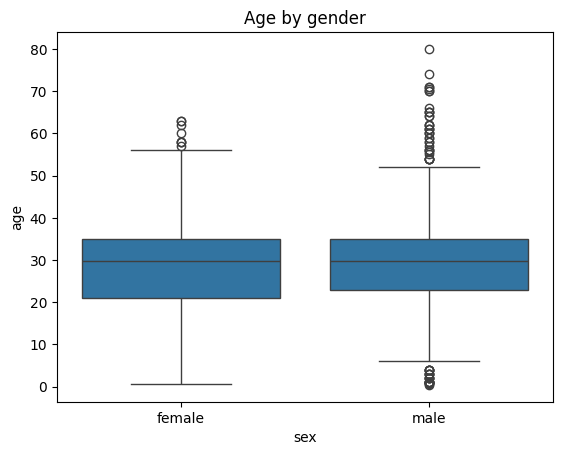

In [15]:
# Bivariate Analysis - Numerical vs Categorical

sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare by Class')
plt.show()

sns.boxplot(x='sex', y='age', data=df)
plt.title('Age by gender')
plt.show()

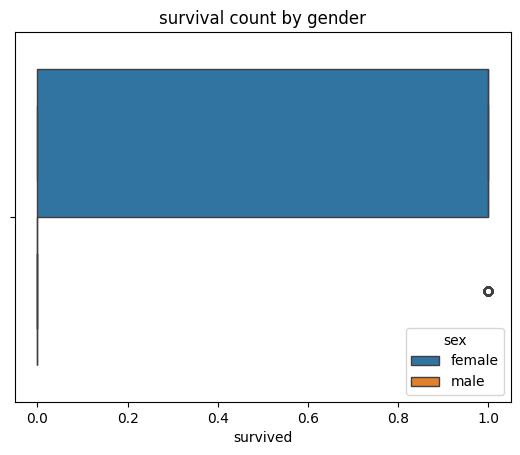

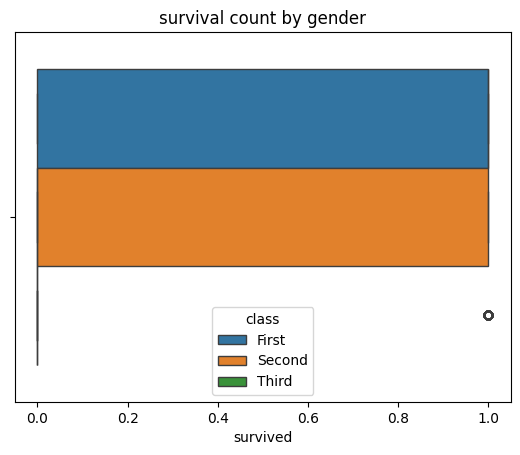

In [18]:
# Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x='survived' ,hue = 'sex',data =df )
plt.title('survival count by gender')
plt.show()

sns.boxplot(x='survived' ,hue = 'class',data =df )
plt.title('survival count by gender')
plt.show()

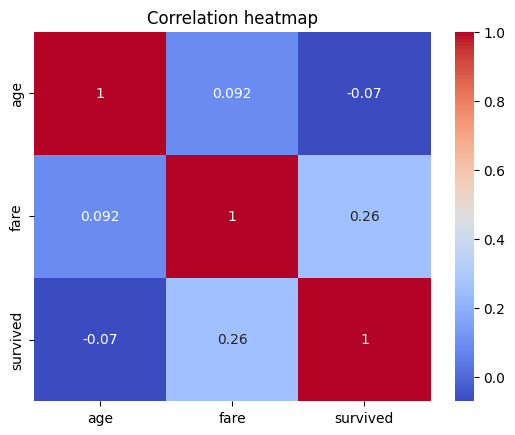

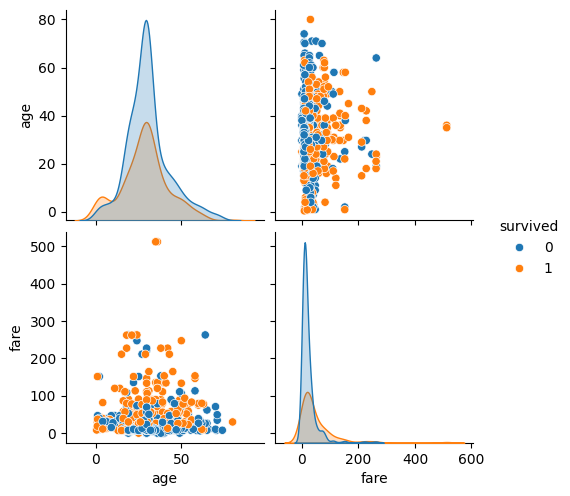

In [20]:
# Correlation and Multivariate Analysis

corr = df[['age','fare','survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

sns.pairplot(df[['age','fare','survived','class']], hue='survived')
plt.show()

Insights :

1. Fair has a positive co-relation with survival.
2. Age shows slightly negative cor-relation with survival.

Number of outliers in fare: 116


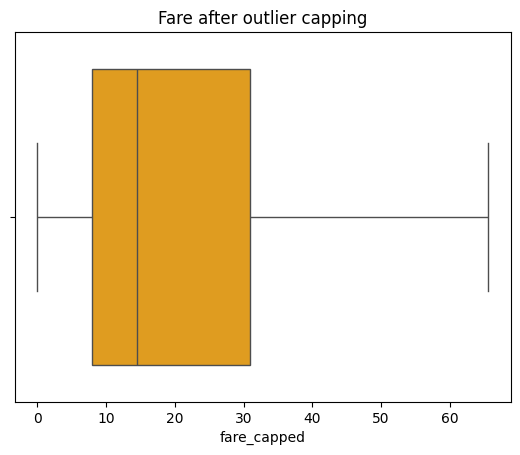

In [23]:
# Outlier detection using IQR method
Q1 = df['fare'].quantile(0.25)

Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers in fare:", len(outliers))

# Outlaier 
df['fare_capped'] = df['fare'].clip(lower, upper)
sns.boxplot(x=df['fare_capped'], color='orange')
plt.title('Fare after outlier capping')
plt.show()

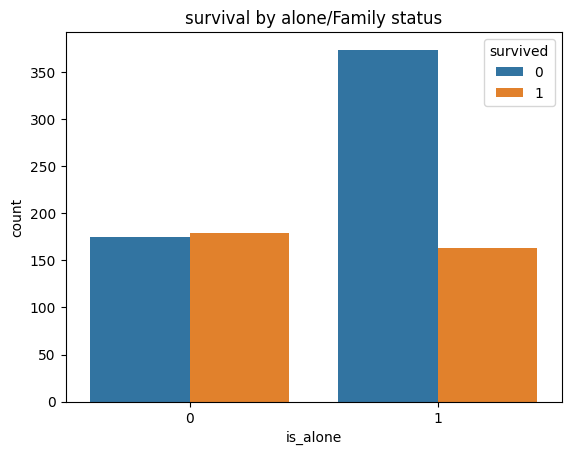

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [26]:
# Feature Engineering

# Create a new feature 

df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x='is_alone',hue= 'survived', data=df)
plt.title('survival by alone/Family status')
plt.show()

df[['family_size','is_alone','survived']].head()


In [27]:
# Explore the cleaned data

df.to_csv('titanic_cleaned.csv', index=False)
print("\n cleaned Titanic data saved to 'titanic_cleaned.csv' ")


 cleaned Titanic data saved to 'titanic_cleaned.csv' 
